# **Freelance**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
# Display the status code and parse the page
url = 'https://www.freelancer.com/job/'
r = requests.get(url)
r.status_code
soup = BeautifulSoup(r.text, 'lxml')

In [7]:
# Extract all ul elements
uls = soup.find_all('ul', {'class':'PageJob-browse-list Grid'})

# Initialize lists to store data
open = []
listings = []
link = []

# Iterate through each <ul> element
for ul in uls:
  jobs = ul.find_all('a')
  links = [link.get('href') for link in jobs]
  link.extend(links)
  jobs = [job.text.replace('\xa0', '').strip() for job in jobs]
  open.extend(jobs)

# Extract number of opportunities
for op in open:
  digit = re.findall(r'\((\d+)\)$', op)
  digit_part = ''.join(digit)
  digit = int(digit_part)
  listings.append(digit)

 # Url constructor
urls = []
for lk in link:
  lk = 'https://www.freelancer.com' + lk
  urls.append(lk)

# Dictionary to store data
data = {'Opportunities': listings, 'Title': open, 'Links': urls}

# Create DataFrame
df = pd.DataFrame(data)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Sort by number of opportunities
df.sort_values(by='Opportunities', ascending=False, inplace=True)
df.reset_index(drop=True)

# Save to csv
df.to_csv('freelance.csv', index=False)

# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3159 entries, 1581 to 1579
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Opportunities  3159 non-null   int64 
 1   Title          3159 non-null   object
 2   Links          3159 non-null   object
dtypes: int64(1), object(2)
memory usage: 98.7+ KB


## Visualization

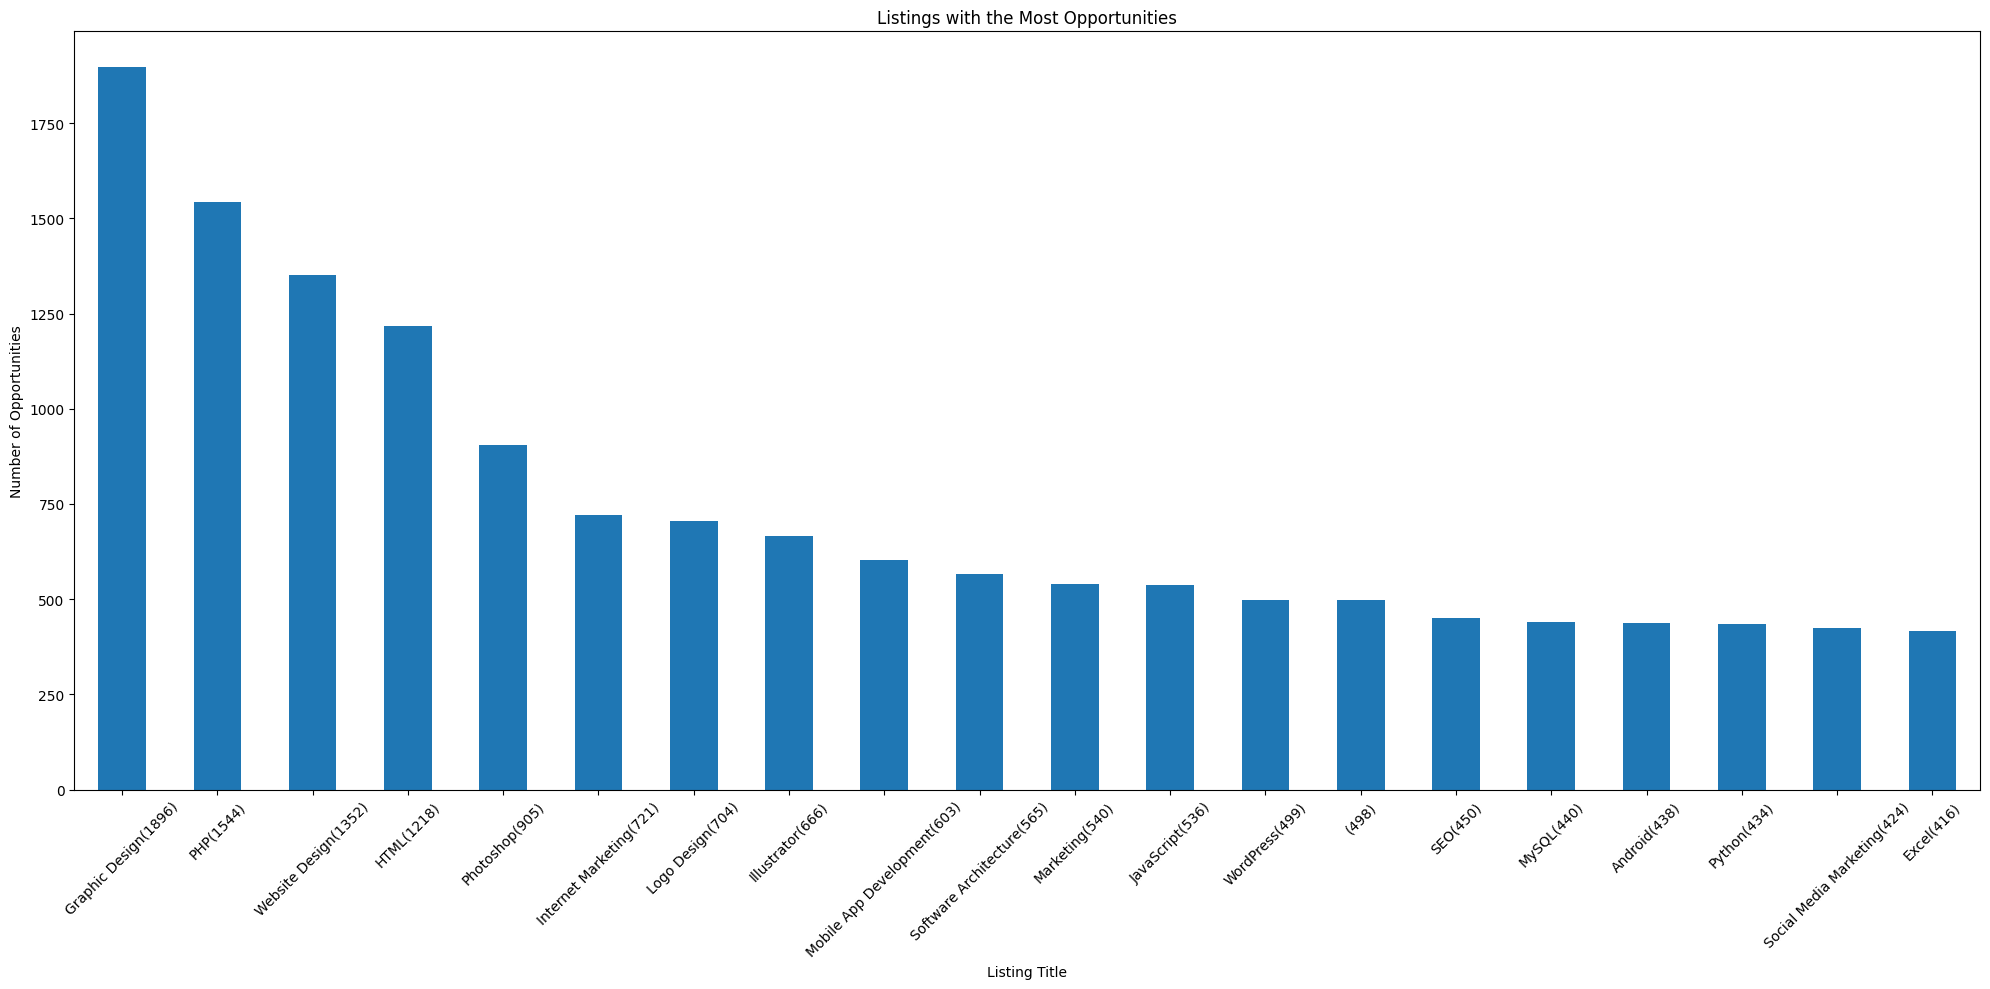

In [14]:
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('freelance.csv')

# Drop the unnecessary link column
df.drop('Links', axis=1, inplace=True)

# Group by Title and sum the Opportunities
grouped_df = df.groupby('Title')['Opportunities'].sum()

# Sort the results in descending order
sorted_df = grouped_df.sort_values(ascending=False)

# Get the top 20 listings with the most opportunities
top_n = 20
top_listings = sorted_df.head(top_n)

# Create a bar chart to visualize the data
top_listings.plot(kind='bar', figsize=(20, 10))
# Adjust figsize as needed for better visualization

# Add a title and labels to the chart
plt.title('Listings with the Most Opportunities')
plt.xlabel('Listing Title')
plt.ylabel('Number of Opportunities')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# **Tech companies**

In [16]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/lamiatabassum/top-50-us-tech-companies-2022-2023-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ellyotty77
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lamiatabassum/top-50-us-tech-companies-2022-2023-dataset


100%|██████████| 1.98k/1.98k [00:00<00:00, 3.05MB/s]

In [23]:
! kaggle datasets download lamiatabassum/top-50-us-tech-companies-2022-2023-dataset

Dataset URL: https://www.kaggle.com/datasets/lamiatabassum/top-50-us-tech-companies-2022-2023-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/1.98k [00:00<?, ?B/s]
100% 1.98k/1.98k [00:00<00:00, 3.99MB/s]


In [24]:
! unzip top-50-us-tech-companies-2022-2023-dataset.zip

Archive:  top-50-us-tech-companies-2022-2023-dataset.zip
  inflating: Top 50 US Tech Companies 2022 - 2023.csv  


In [41]:
df = pd.read_csv('Top 50 US Tech Companies 2022 - 2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Company Name                                      50 non-null     object 
 1   Industry                                          50 non-null     object 
 2   Sector                                            50 non-null     object 
 3   HQ State                                          50 non-null     object 
 4   Founding Year                                     50 non-null     int64  
 5   Annual Revenue 2022-2023 (USD in Billions)        50 non-null     float64
 6   Market Cap (USD in Trillions)                     50 non-null     float64
 7   Stock Name                                        50 non-null     object 
 8   Annual Income Tax in 2022-2023 (USD in Billions)  50 non-null     float64
 9   Employee Size          

In [42]:
df.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473


In [43]:
df.sort_values(by='Annual Revenue 2022-2023 (USD in Billions)', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
1,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
4,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
5,Dell Technologies Inc.,Technology,Computer Hardware,Texas,1984,102.30,0.028,DELL,0.981,133000
6,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
7,Intel Corporation,Technology,Semiconductors,California,1968,63.05,0.118,INTC,-0.249,131900
8,IBM Corporation,Technology,IT Services,New York,1911,60.52,0.113,IBM,-0.626,345000
9,HP Inc.,Technology,Computer Hardware,California,1939,59.78,0.028,HPQ,1.238,51000


## Visualization

### *Revenue chart*

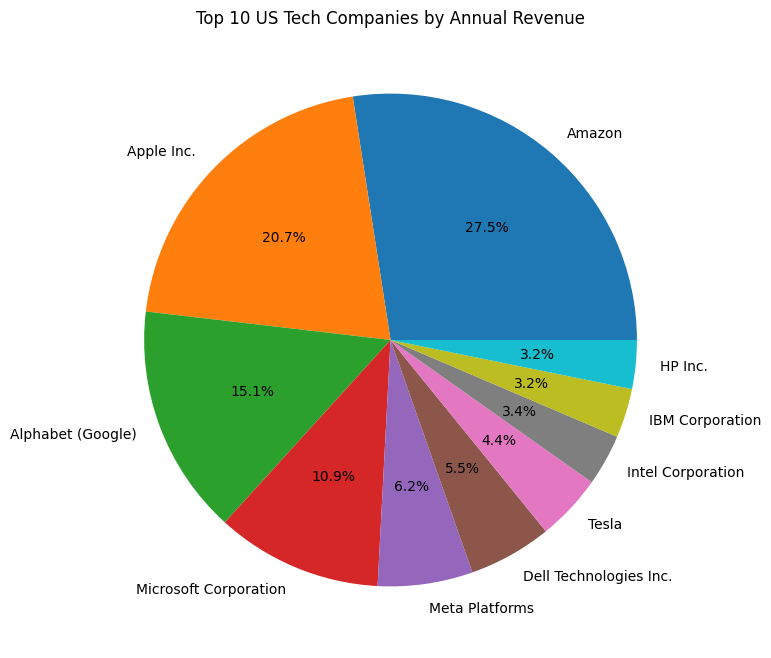

In [48]:
import matplotlib.pyplot as plt
# Get the top 10 companies by annual revenue
top_10_companies = df.head(10)

# Extract the company names and annual revenue
company_names = top_10_companies['Company Name'].tolist()
annual_revenue = top_10_companies['Annual Revenue 2022-2023 (USD in Billions)'].tolist()

# Create a dictionary to store the data
data = {'Company Name': company_names, 'Annual Revenue': annual_revenue}

# Create a DataFrame
df_top_10 = pd.DataFrame(data)

# Plot the pie chart
plt.figure(figsize=(15, 8))
plt.pie(df_top_10['Annual Revenue'], labels=df_top_10['Company Name'], autopct="%1.1f%%")
plt.title('Top 10 US Tech Companies by Annual Revenue')
plt.show()

### *Market cap chart*

Market capitalization, or "market cap," represents the total dollar market value of a company's outstanding shares of stock. Investors use this figure to determine a company's size instead of sales or total asset value. In an acquisition, the market cap helps determine whether a takeover candidate represents a good value for the acquirer.


* Market capitalization shows how much a company is worth as determined by the total market value of all outstanding shares.
* To calculate a company's market cap, multiply the number of outstanding shares by the current market value of one share.
* Market cap is used to determine a company's size, and then compare the company's financial performance to other companies of various sizes.

**Market Cap = Current Share Price * Total Number of Shares Outstanding**


Large-cap companies typically have a market capitalization of $10 billion or more and represent major players in well-established industries and sectors.

 These companies generally reward investors with a consistent increase in share value and dividend payments. Examples of large-cap companies include Apple Inc., Microsoft Corp., and Alphabet Inc.

Mid-cap companies generally have a market capitalization between $2 billion and $10 billion.
 Mid-cap companies operate in an industry expected to experience rapid growth. Mid-cap companies are in the process of expanding and carry an inherently higher risk than large-cap companies. One example of a mid-cap company is Eagle Materials Inc. (EXP).

Companies with a market capitalization between $250 million and $2 billion are commonly classified as small-cap companies. These small companies may serve niche markets and new industries. These companies are considered higher-risk investments due to their age, the markets they serve, and their size. Small-cap share prices may be more volatile but provide greater growth opportunities than large caps. Smaller companies, known as micro-cap, have values below $250 million.

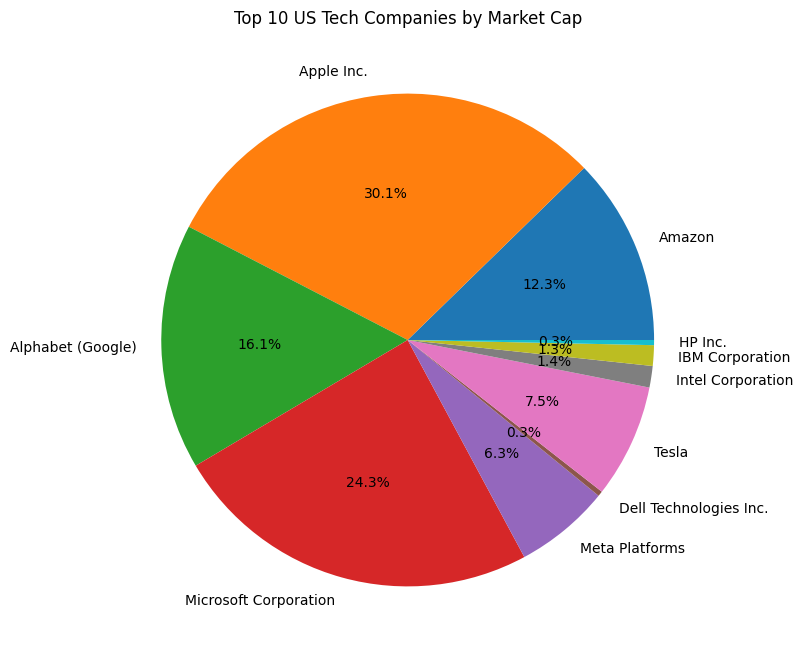

In [50]:
import matplotlib.pyplot as plt
# Get the top 10 companies by annual revenue
top_10_companies = df.head(10)

# Extract the company names and annual revenue
company_names = top_10_companies['Company Name'].tolist()
market_cap = top_10_companies['Market Cap (USD in Trillions)'].tolist()

# Create a dictionary to store the data
data = {'Company Name': company_names, 'Market Cap (USD in Trillions)': market_cap}

# Create a DataFrame
df_top_10 = pd.DataFrame(data)

# Plot the pie chart
plt.figure(figsize=(15, 8))
plt.pie(df_top_10['Market Cap (USD in Trillions)'], labels=df_top_10['Company Name'], autopct="%1.1f%%")
plt.title('Top 10 US Tech Companies by Market Cap')
plt.show()

### *Employee Size*

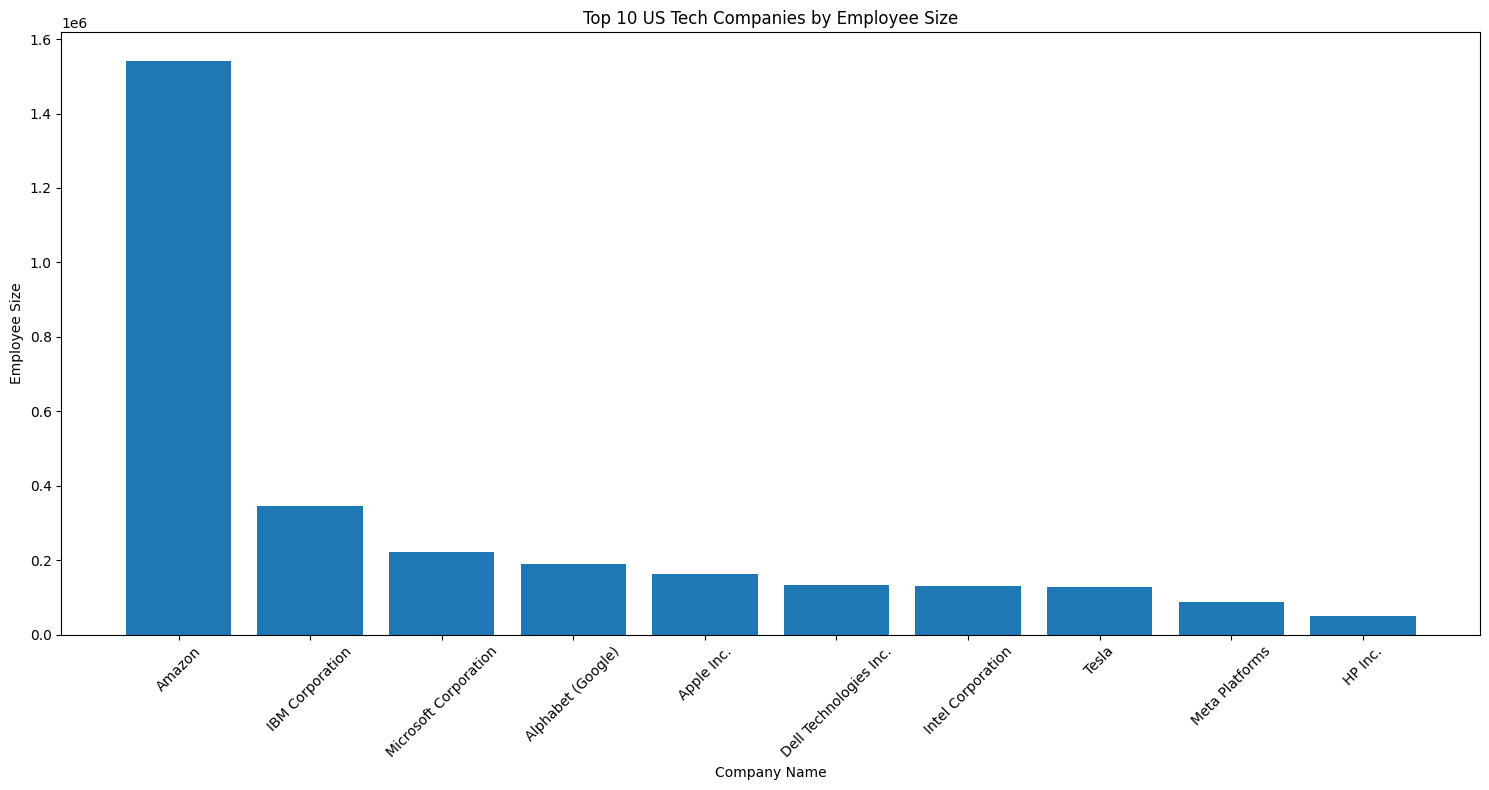

In [51]:
import matplotlib.pyplot as plt
# Get the top 10 companies by employee size
top_10_companies = df.head(10)

# Extract the company names and employee size
company_names = top_10_companies['Company Name'].tolist()
employee_size = top_10_companies['Employee Size'].tolist()

# Create a dictionary to store the data
data = {'Company Name': company_names, 'Employee Size': employee_size}

# Create a DataFrame
df_top_10 = pd.DataFrame(data)

# Sort the DataFrame by employee size
df_top_10.sort_values(by='Employee Size', ascending=False, inplace=True)

# Reset the index
df_top_10.reset_index(drop=True, inplace=True)

# Create a bar chart
plt.figure(figsize=(15, 8))
plt.bar(df_top_10['Company Name'], df_top_10['Employee Size'])
plt.title('Top 10 US Tech Companies by Employee Size')
plt.xlabel('Company Name')
plt.ylabel('Employee Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Tech salaries**

In [52]:
!kaggle datasets download whenamancodes/software-professional-salary-dataset

Dataset URL: https://www.kaggle.com/datasets/whenamancodes/software-professional-salary-dataset
License(s): other
  0% 0.00/520k [00:00<?, ?B/s]
100% 520k/520k [00:00<00:00, 71.6MB/s]


In [53]:
!unzip software-professional-salary-dataset.zip

Archive:  software-professional-salary-dataset.zip
  inflating: Salary_Dataset_with_Extra_Features.csv  
  inflating: Software_Professional_Salaries.csv  


In [59]:
df = pd.read_csv('Software_Professional_Salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22773 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [60]:
df.sort_values(by='Salary', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.6,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi
1,3.8,Concentrix,Oracle Database Administrator,10000000,1,Bangalore
2,3.6,OASYS Cybernetics,Senior Java Developer,10000000,1,Chennai
3,3.5,Koru UX Design,Senior Front End Developer,10000000,1,Pune
4,3.7,Nityo Infotech,"Lead UI Designer, Magento Front-end Developer",9900000,1,Bangalore
5,3.8,Amazon,Software Development Engineer (SDE),9850000,1,Kolkata
6,4.2,FFF Enterprises,Non Software Development Engineer,9800000,1,Mumbai
7,4.3,Digital Raju,Software Development Engineer (SDE),9800000,1,New Delhi
8,5.0,Gaana Lyrics Point.com,Software Development Engineer (SDE) II,9700000,1,Hyderabad
9,4.6,GGH Heavy Industries,Best Buy Mobile Sales Associate,9600000,1,Bangalore


In [63]:
# Group by job title and calculate the average salary
average_salaries = df.groupby('Job Title')['Salary'].mean()

# Sort the results in descending order
sorted_salaries = average_salaries.sort_values(ascending=False)
sorted_salaries.head(20)

Job Title
Lead UI Designer, Magento Front-end Developer                   9.900000e+06
Non Software Development Engineer                               9.800000e+06
Mobile App Development                                          5.000000e+06
Front-end - Intern                                              4.900000e+06
Principal Mobile Architect                                      4.800000e+06
Front-End Architect                                             4.700000e+06
Staff Software Development Engineer                             4.466667e+06
Senior Manager Software Development Engineering                 4.233333e+06
SMTS Software Development Engineer                              4.200000e+06
Database Administrator (Database Administrator) - Contractor    4.100000e+06
Manager, Database Administration                                4.000000e+06
Backend Engineer Head                                           3.600000e+06
Android Team Leader                                             3.

# **AI salaries**

In [64]:
!kaggle datasets download msjahid/global-ai-ml-and-data-science-salaries

Dataset URL: https://www.kaggle.com/datasets/msjahid/global-ai-ml-and-data-science-salaries
License(s): CC0-1.0
  0% 0.00/142k [00:00<?, ?B/s]
100% 142k/142k [00:00<00:00, 92.3MB/s]


In [65]:
!unzip global-ai-ml-and-data-science-salaries.zip

Archive:  global-ai-ml-and-data-science-salaries.zip
  inflating: global_ai_ml_data_salaries.csv  


In [71]:
df = pd.read_csv('global_ai_ml_data_salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22144 entries, 0 to 22143
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           22144 non-null  int64 
 1   experience_level    22144 non-null  object
 2   employment_type     22144 non-null  object
 3   job_title           22144 non-null  object
 4   salary              22144 non-null  int64 
 5   salary_currency     22144 non-null  object
 6   salary_in_usd       22144 non-null  int64 
 7   employee_residence  22144 non-null  object
 8   remote_ratio        22144 non-null  int64 
 9   company_location    22144 non-null  object
 10  company_size        22144 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


In [73]:
# Group by job title and get the jobs with the largest salaries
highest_paying_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Round the mean values to the nearest integer
highest_paying_jobs = highest_paying_jobs.apply(round)

# Print the top 10 highest-paying job titles
print(f"Top 10 highest-paying AI jobs:\n{highest_paying_jobs.head(10)}")

Top 10 highest-paying AI jobs:
job_title
Analytics Engineering Manager    399880
Data Science Tech Lead           375000
Head of Machine Learning         288701
AWS Data Architect               258000
Cloud Data Architect             250000
AI Architect                     238457
AI Solution Architect            226729
Prompt Engineer                  215084
Head of Data                     213702
Robotics Software Engineer       198750
Name: salary_in_usd, dtype: int64


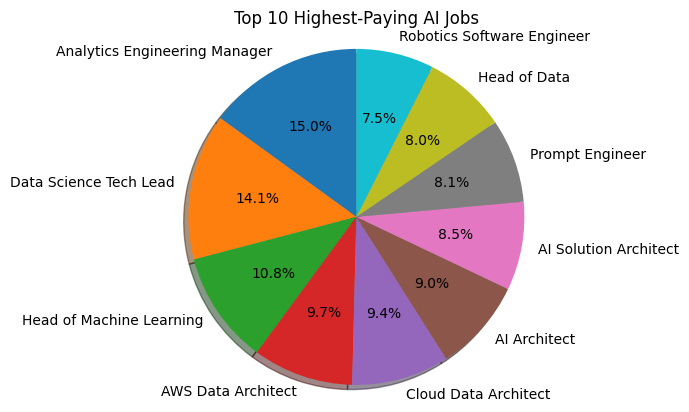

In [75]:
# Plot pie chart
import matplotlib.pyplot as plt
# Create a pie chart of the top 10 highest-paying AI jobs
labels = highest_paying_jobs.head(10).index.to_list()
sizes = highest_paying_jobs.head(10).values.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title("Top 10 Highest-Paying AI Jobs")
plt.show()